In [6]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_excel('Monthly_CO2_Concentrations.xlsx',
                     converters={'Year': np.int32, 'Month': np.int32})

In [10]:
data.head()


,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [18]:

data = data.loc[(~pd.isnull(data['CO2']))&\
                (~pd.isnull(data['Year']))&\
                (~pd.isnull(data['Month']))]
data.sort_values(['Year', 'Month'], inplace=True)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(-20.0, 0, '1986-02'),
  Text(0.0, 0, '1974-05'),
  Text(20.0, 0, '1976-01'),
  Text(40.0, 0, '1977-09'),
  Text(60.0, 0, '1979-05'),
  Text(80.0, 0, '1981-01'),
  Text(100.0, 0, '1982-09'),
  Text(120.0, 0, '1984-05'),
  Text(140.0, 0, '1986-01'),
  Text(160.0, 0, '1987-09'),
  Text(180.0, 0, '')])

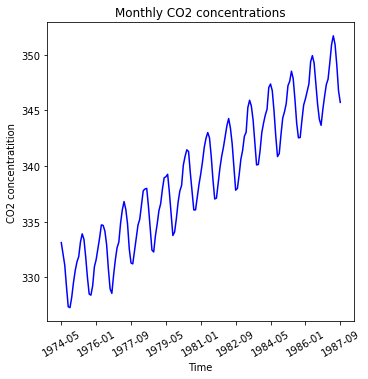

In [19]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)


(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '1981-08'),
  Text(0.0, 0, '1980-01'),
  Text(5.0, 0, '1980-06'),
  Text(10.0, 0, '1980-11'),
  Text(15.0, 0, '1981-04'),
  Text(20.0, 0, '1981-09'),
  Text(25.0, 0, '')])

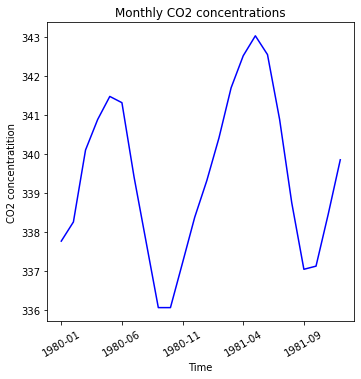

In [20]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)


In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],trend_model.intercept_) )

Trend model coefficient=0.12099301242236025 and intercept=329.45310559006214


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(-20.0, 0, '1986-02'),
  Text(0.0, 0, '1974-05'),
  Text(20.0, 0, '1976-01'),
  Text(40.0, 0, '1977-09'),
  Text(60.0, 0, '1979-05'),
  Text(80.0, 0, '1981-01'),
  Text(100.0, 0, '1982-09'),
  Text(120.0, 0, '1984-05'),
  Text(140.0, 0, '1986-01'),
  Text(160.0, 0, '1987-09'),
  Text(180.0, 0, '')])

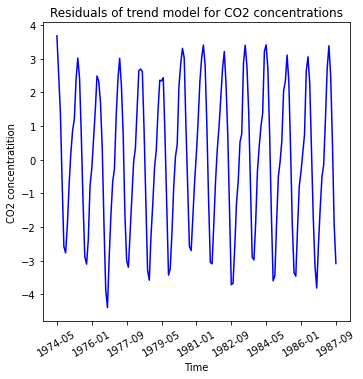

In [25]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)


In [26]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [27]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '(1985, Q2)'),
  Text(0.0, 0, '(1974, Q2)'),
  Text(10.0, 0, '(1976, Q4)'),
  Text(20.0, 0, '(1979, Q2)'),
  Text(30.0, 0, '(1981, Q4)'),
  Text(40.0, 0, '(1984, Q2)'),
  Text(50.0, 0, '(1986, Q4)'),
  Text(60.0, 0, '')])

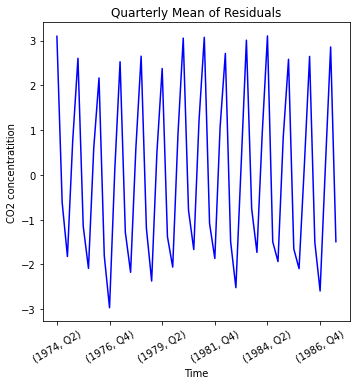

In [28]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '(1985, Q2)'),
  Text(0.0, 0, '(1974, Q2)'),
  Text(10.0, 0, '(1976, Q4)'),
  Text(20.0, 0, '(1979, Q2)'),
  Text(30.0, 0, '(1981, Q4)'),
  Text(40.0, 0, '(1984, Q2)'),
  Text(50.0, 0, '(1986, Q4)'),
  Text(60.0, 0, '')])

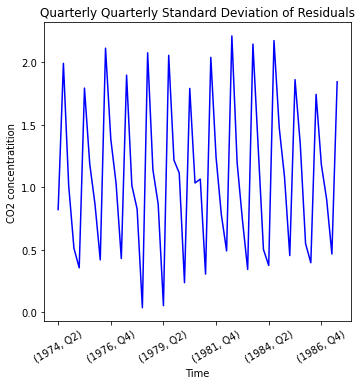

In [29]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)


Text(0, 0.5, 'CO2 concentratition')

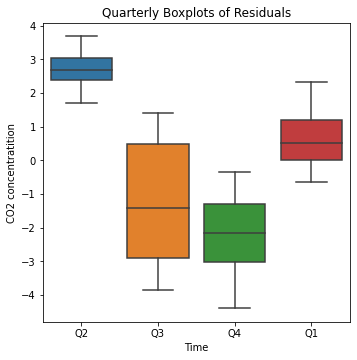

In [30]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')


In [37]:
inflation = pd.read_excel('Data Files/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [38]:
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


Text(0.5, 0, 'Years')

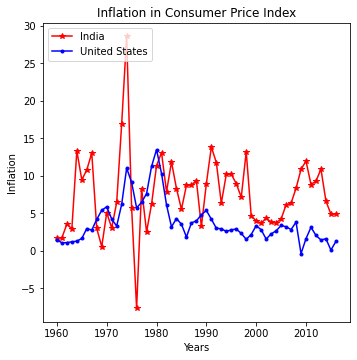

In [39]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')
